# Proyecto 1: Movistar

**Movistar está preocupada por el aterrizaje de Netflix y por la oferta de Vodafone. Teme que algunos de sus clientes que tienen contratado MovistarPlus se vean atraídos por la nueva oferta de Vodafone. Os plantea la realización del diseño de una campaña de incentivos para mantener el mayor número de clientes en su empresa. En concreto os piden:**

**1. Análisis de perfiles de posibles desertores. Os piden que determinéis un perfil del posible desertor. Y también un perfil para aquel que no lo sea. La empresa os proporciona un dataset con un histórico de clientes que han dejado la empresa y los que no. A partir de él tenéis que identificar el perfil o perfiles de los que han dejado la empresa para prever los que tienen una alta probabilidad de solicitar portabilidades a Vodafone. Los perfiles tienen que identificar los atributos relevantes y los valores para dichos atributos.**

In [ ]:
import pandas as pd

file_id = '1PceG_WINLWGZz6Z41Ryqkee_zl_krD1P'
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(csv_url)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
print(f"Dimensiones del dataset: {df.shape}")

print("\nInformación general:")
display(df.info())

Dimensiones del dataset: (7043, 21)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null

None

In [ ]:
# Convertimos TotalCharges a float
# Se reemplazan los espacios vacíos por NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)

# Se convierte la columna a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
print("\nValores nulos por columna:")
display(df.isnull().sum())

print("\nDistribución de clientes por deserción:")
churn_distribution = pd.concat([df['Churn'].value_counts(),
                                df['Churn'].value_counts(normalize=True).mul(100).round(2).astype(str)],
                                axis=1, keys=['Recuento', 'Porcentaje'])

display(churn_distribution)


Valores nulos por columna:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0



Distribución de clientes por deserción:


,Recuento,Porcentaje
Churn,,
No,5174,73.46
Yes,1869,26.54


In [ ]:
# Entradas sin datos en TotalCharges
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Las entradas sin datos en TotalCharges tienen tenure 0, es decir 0 meses de permanencia, son clientes que acaban de registrarse por lo que factura total es 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
account_cols = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

def analyze_categorical_features(dataframe, features):
    for feature in features:
        if feature in df.columns:
            print(f"\n\nRelación entre {feature} y deserción:")
            churn_rate = pd.crosstab(df[feature], df['Churn'], normalize='index').mul(100).round(2)
            counts = pd.crosstab(df[feature], df['Churn'])

            result = pd.concat([counts, churn_rate], axis=1, keys=['Recuento', 'Porcentaje (%)'])
            display(result)

def analyze_numerical_features(dataframe, features):
    for feature in features:
        if feature in df.columns:
            print(f"\n\nEstadísticas de {feature} por deserción:")
            display(df.groupby('Churn')[feature].describe())

# Columnas categóricas reales (excluyendo ID y target)
categorical_cols = [col for col in df.columns
                    if df[col].dtype == 'object' and col not in ['customerID', 'Churn']] + ['SeniorCitizen']

# Columnas numéricas reales
numerical_cols = [col for col in df.columns
                  if col not in categorical_cols + ['customerID', 'Churn']]

if 'Churn' in df.columns:
    analyze_categorical_features(df, categorical_cols)
    analyze_numerical_features(df, numerical_cols)



Relación entre gender y deserción:


Recuento      Porcentaje (%)       
Churn        No  Yes             No    Yes
gender                                    
Female     2549  939          73.08  26.92
Male       2625  930          73.84  26.16



Relación entre Partner y deserción:


Recuento       Porcentaje (%)       
Churn         No   Yes             No    Yes
Partner                                     
No          2441  1200          67.04  32.96
Yes         2733   669          80.34  19.66



Relación entre Dependents y deserción:


Recuento       Porcentaje (%)       
Churn            No   Yes             No    Yes
Dependents                                     
No             3390  1543          68.72  31.28
Yes            1784   326          84.55  15.45



Relación entre PhoneService y deserción:


Recuento       Porcentaje (%)       
Churn              No   Yes             No    Yes
PhoneService                                     
No                512   170          75.07  24.93
Yes              4662  1699          73.29  26.71



Relación entre MultipleLines y deserción:


Recuento      Porcentaje (%)       
Churn                  No  Yes             No    Yes
MultipleLines                                       
No                   2541  849          74.96  25.04
No phone service      512  170          75.07  24.93
Yes                  2121  850          71.39  28.61



Relación entre InternetService y deserción:


Recuento       Porcentaje (%)       
Churn                 No   Yes             No    Yes
InternetService                                     
DSL                 1962   459          81.04  18.96
Fiber optic         1799  1297          58.11  41.89
No                  1413   113          92.60   7.40



Relación entre OnlineSecurity y deserción:


Recuento       Porcentaje (%)       
Churn                     No   Yes             No    Yes
OnlineSecurity                                          
No                      2037  1461          58.23  41.77
No internet service     1413   113          92.60   7.40
Yes                     1724   295          85.39  14.61



Relación entre OnlineBackup y deserción:


Recuento       Porcentaje (%)       
Churn                     No   Yes             No    Yes
OnlineBackup                                            
No                      1855  1233          60.07  39.93
No internet service     1413   113          92.60   7.40
Yes                     1906   523          78.47  21.53



Relación entre DeviceProtection y deserción:


Recuento       Porcentaje (%)       
Churn                     No   Yes             No    Yes
DeviceProtection                                        
No                      1884  1211          60.87  39.13
No internet service     1413   113          92.60   7.40
Yes                     1877   545          77.50  22.50



Relación entre TechSupport y deserción:


Recuento       Porcentaje (%)       
Churn                     No   Yes             No    Yes
TechSupport                                             
No                      2027  1446          58.36  41.64
No internet service     1413   113          92.60   7.40
Yes                     1734   310          84.83  15.17



Relación entre StreamingTV y deserción:


Recuento      Porcentaje (%)       
Churn                     No  Yes             No    Yes
StreamingTV                                            
No                      1868  942          66.48  33.52
No internet service     1413  113          92.60   7.40
Yes                     1893  814          69.93  30.07



Relación entre StreamingMovies y deserción:


Recuento      Porcentaje (%)       
Churn                     No  Yes             No    Yes
StreamingMovies                                        
No                      1847  938          66.32  33.68
No internet service     1413  113          92.60   7.40
Yes                     1914  818          70.06  29.94



Relación entre Contract y deserción:


Recuento       Porcentaje (%)       
Churn                No   Yes             No    Yes
Contract                                           
Month-to-month     2220  1655          57.29  42.71
One year           1307   166          88.73  11.27
Two year           1647    48          97.17   2.83



Relación entre PaperlessBilling y deserción:


Recuento       Porcentaje (%)       
Churn                  No   Yes             No    Yes
PaperlessBilling                                     
No                   2403   469          83.67  16.33
Yes                  2771  1400          66.43  33.57



Relación entre PaymentMethod y deserción:


Recuento       Porcentaje (%)       
Churn                           No   Yes             No    Yes
PaymentMethod                                                 
Bank transfer (automatic)     1286   258          83.29  16.71
Credit card (automatic)       1290   232          84.76  15.24
Electronic check              1294  1071          54.71  45.29
Mailed check                  1304   308          80.89  19.11



Relación entre SeniorCitizen y deserción:


Recuento       Porcentaje (%)       
Churn               No   Yes             No    Yes
SeniorCitizen                                     
0                 4508  1393          76.39  23.61
1                  666   476          58.32  41.68



Estadísticas de tenure por deserción:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0




Estadísticas de MonthlyCharges por deserción:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35




Estadísticas de TotalCharges por deserción:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

print("Forma original del dataframe:", df.shape)
print("\nValores únicos en columna Churn:")
print(df['Churn'].value_counts())
print("\nInformación de columnas:")
print(df.dtypes)

#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

print("\nValores nulos por columna después de convertir TotalCharges:")
print(df.isnull().sum())

def prepare_data_for_supervised(df):
    data = df.copy()
    data_clean = data.dropna()

    if len(data_clean) < len(data):
        print(f"Se eliminaron {len(data) - len(data_clean)} filas con valores nulos")

    # Codificar la variable objetivo explícitamente
    data_clean['Churn_Encoded'] = data_clean['Churn'].map({'Yes': 1, 'No': 0})

    # Si aún hay nulos, eliminar esas filas
    if data_clean['Churn_Encoded'].isnull().sum() > 0:
        data_clean = data_clean.dropna(subset=['Churn_Encoded'])
        print(f"Se eliminaron {len(data_clean) - len(data)} filas adicionales con Churn nulo")

    # Convertir variables categóricas a numéricas
    le = LabelEncoder()
    categorical_cols = []

    for col in data_clean.columns:
        if data_clean[col].dtype == 'object' and col != 'customerID':
            data_clean[col] = le.fit_transform(data_clean[col])
            categorical_cols.append(col)

    # Eliminar customerID si existe
    if 'customerID' in data_clean.columns:
        data_clean = data_clean.drop('customerID', axis=1)

    print(f"Dimensiones del dataframe después de preprocesamiento: {data_clean.shape}")

    return data_clean, categorical_cols


# Preparar los datos
processed_data, categorical_cols = prepare_data_for_supervised(df)

# Verificación final
print("\nVerificación final:")
print("Forma del dataframe procesado:", processed_data.shape)
print("Valores nulos en dataframe procesado:")
print(processed_data.isnull().sum().sum())

# Separar features y target
X = processed_data.drop(['Churn', 'Churn_Encoded'], axis=1)
y = processed_data['Churn_Encoded']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nForma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Forma original del dataframe: (7043, 21)

Valores únicos en columna Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Información de columnas:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Valores nulos por columna después de convertir TotalCharges:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
Int


Entrenando modelo: Ridge
AUC en conjunto de prueba: 0.8429

Entrenando modelo: Lasso
AUC en conjunto de prueba: 0.8416

Entrenando modelo: Random Forest
AUC en conjunto de prueba: 0.8164

Entrenando modelo: XGBoost
AUC en conjunto de prueba: 0.8311

Entrenando modelo: SVM
AUC en conjunto de prueba: 0.8373

--- TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ---
                  avg_rank     Ridge     Lasso  Random Forest   XGBoost  \
tenure                 2.6  1.309963  0.848751       0.152228  0.028694   
MonthlyCharges         3.4  0.679879  0.741427       0.178550  0.021560   
Contract               4.0  0.603225  0.590314       0.079366  0.442101   
TotalCharges           4.8  0.618961  0.117044       0.187702  0.022289   
OnlineSecurity         5.2  0.243349  0.232210       0.047682  0.067994   
TechSupport            5.8  0.225879  0.214573       0.045577  0.055577   
PaperlessBilling       8.0  0.214696  0.203479       0.026633  0.027138   
InternetService        8.2  0.118870  0.0818

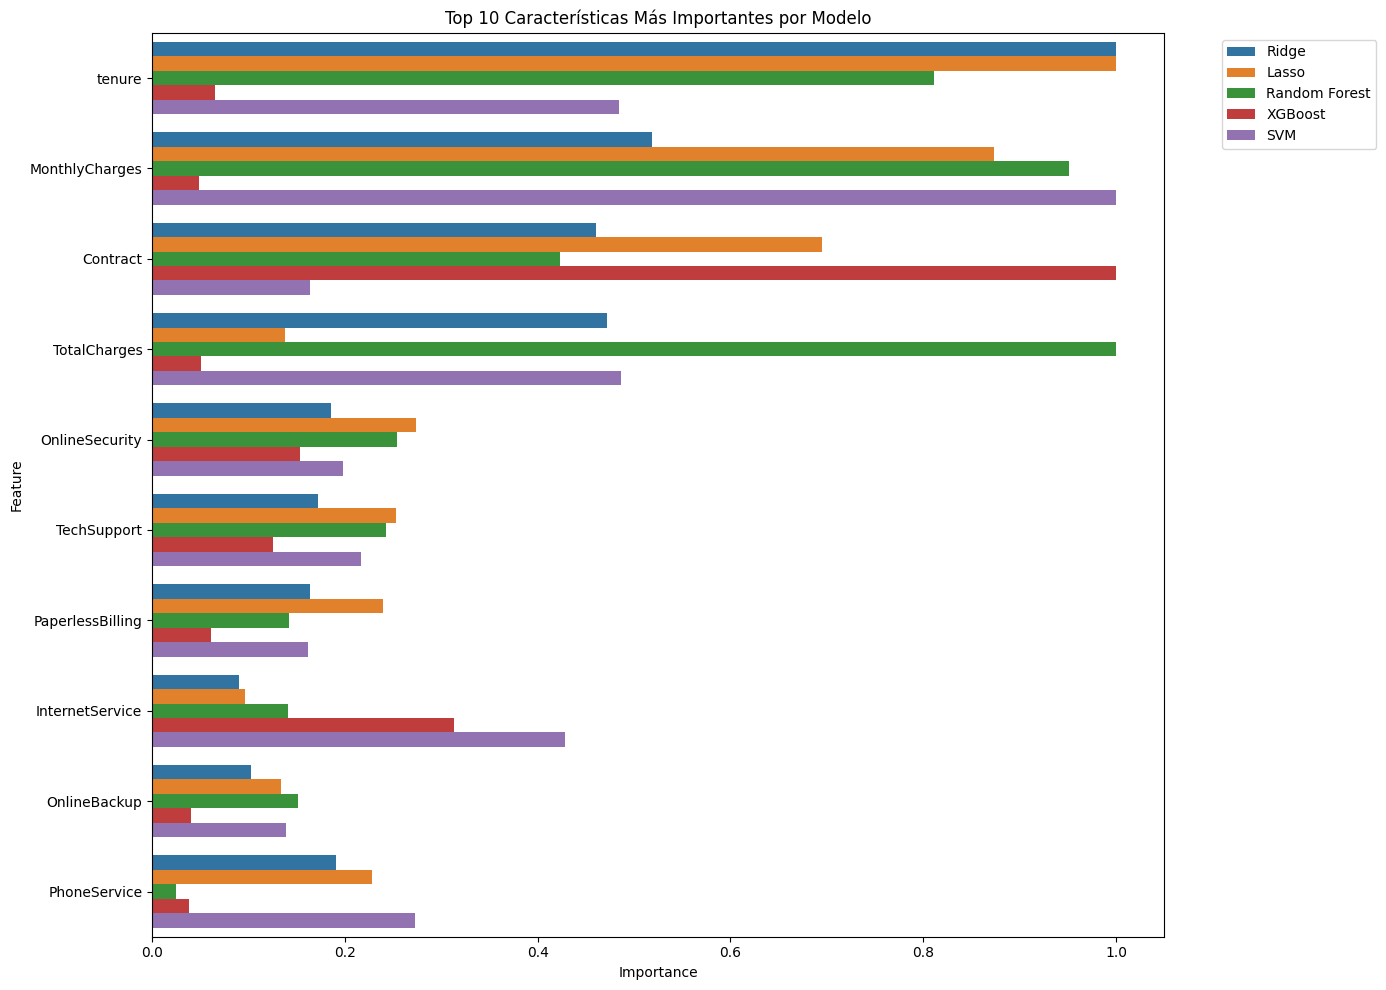

In [ ]:
# 2. Entrenamiento de múltiples modelos y selección de características
models = {
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=0.01, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, learning_rate=0.1),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

feature_importance_df = pd.DataFrame(index=X.columns)

# Entrenar modelos y registrar importancia de características
for name, model in models.items():
    print(f"\nEntrenando modelo: {name}")

    # Entrenar modelo
    if name in ['Ridge', 'Lasso']:
        # Para modelos lineales usamos LogisticRegression para clasificación
        clf = LogisticRegression(penalty='l2' if name=='Ridge' else 'l1', solver='saga', random_state=42,
                                C=1.0 if name=='Ridge' else 0.1, max_iter=1000)
        clf.fit(X_train_scaled, y_train)

        # Obtener coeficientes para importancia
        importance = np.abs(clf.coef_[0])

    elif name == 'SVM':
        # Para SVM lineal
        clf = models[name]
        clf.fit(X_train_scaled, y_train)

        # Obtener coeficientes para importancia en SVM lineal
        importance = np.abs(clf.coef_[0])

    else:
        # Para RF y XGBoost
        clf = models[name]
        clf.fit(X_train_scaled, y_train)

        # Obtener importancia
        importance = clf.feature_importances_

    # Evaluar rendimiento
    if name in ['Ridge', 'Lasso', 'SVM']:
        y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC en conjunto de prueba: {auc:.4f}")

    # Guardar importancia de características
    feature_importance_df[name] = importance

# 3. Agregar el ranking de importancia para cada modelo
for col in feature_importance_df.columns:
    feature_importance_df[f"{col}_rank"] = feature_importance_df[col].rank(ascending=False)

# Calcular ranking promedio entre todos los modelos
rank_columns = [col for col in feature_importance_df.columns if col.endswith('_rank')]
feature_importance_df['avg_rank'] = feature_importance_df[rank_columns].mean(axis=1)

# Ordenar por ranking promedio
feature_importance_df = feature_importance_df.sort_values('avg_rank')

# Mostrar top 10 características
print("\n--- TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ---")
print(feature_importance_df[['avg_rank'] + feature_importance_df.columns[:-1].tolist()].head(15))

# 4. Visualizar importancia de características en un solo gráfico
top_features = feature_importance_df.head(10).index

# Crear un único dataframe para la visualización
viz_df = pd.DataFrame()
for model in models.keys():
    temp_df = pd.DataFrame({
        'Feature': top_features,
        'Importance': feature_importance_df.loc[top_features, model],
        'Model': model
    })
    viz_df = pd.concat([viz_df, temp_df])

# Normalizar la importancia dentro de cada modelo para mejor comparación
for model in models.keys():
    model_max = viz_df[viz_df['Model'] == model]['Importance'].max()
    viz_df.loc[viz_df['Model'] == model, 'Importance'] = viz_df.loc[viz_df['Model'] == model, 'Importance'] / model_max

plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', hue='Model', data=viz_df)
plt.title('Top 10 Características Más Importantes por Modelo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
account_cols = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

def analyze_categorical_features(dataframe, features):
    for feature in features:
        if feature in df.columns:
            print(f"\n\nRelación entre {feature} y deserción:")
            churn_rate = pd.crosstab(df[feature], df['Churn'], normalize='index').mul(100).round(2)
            counts = pd.crosstab(df[feature], df['Churn'])

            result = pd.concat([counts, churn_rate], axis=1, keys=['Recuento', 'Porcentaje (%)'])
            display(result)

def analyze_numerical_features(dataframe, features):
    for feature in features:
        if feature in df.columns:
            print(f"\n\nEstadísticas de {feature} por deserción:")
            display(df.groupby('Churn')[feature].describe())

# Columnas categóricas reales (excluyendo ID y target)
categorical_cols = [col for col in top_features
                    if df[col].dtype == 'object' and col not in ['customerID', 'Churn']]

# Columnas numéricas reales
numerical_cols = [col for col in top_features
                  if col not in categorical_cols + ['customerID', 'Churn']]

if 'Churn' in df.columns:
    analyze_categorical_features(df, categorical_cols )
    analyze_numerical_features(df, numerical_cols)



Relación entre Contract y deserción:


Recuento       Porcentaje (%)       
Churn                No   Yes             No    Yes
Contract                                           
Month-to-month     2220  1655          57.29  42.71
One year           1307   166          88.73  11.27
Two year           1647    48          97.17   2.83



Relación entre OnlineSecurity y deserción:


Recuento       Porcentaje (%)       
Churn                     No   Yes             No    Yes
OnlineSecurity                                          
No                      2037  1461          58.23  41.77
No internet service     1413   113          92.60   7.40
Yes                     1724   295          85.39  14.61



Relación entre TechSupport y deserción:


Recuento       Porcentaje (%)       
Churn                     No   Yes             No    Yes
TechSupport                                             
No                      2027  1446          58.36  41.64
No internet service     1413   113          92.60   7.40
Yes                     1734   310          84.83  15.17



Relación entre PaperlessBilling y deserción:


Recuento       Porcentaje (%)       
Churn                  No   Yes             No    Yes
PaperlessBilling                                     
No                   2403   469          83.67  16.33
Yes                  2771  1400          66.43  33.57



Relación entre InternetService y deserción:


Recuento       Porcentaje (%)       
Churn                 No   Yes             No    Yes
InternetService                                     
DSL                 1962   459          81.04  18.96
Fiber optic         1799  1297          58.11  41.89
No                  1413   113          92.60   7.40



Relación entre OnlineBackup y deserción:


Recuento       Porcentaje (%)       
Churn                     No   Yes             No    Yes
OnlineBackup                                            
No                      1855  1233          60.07  39.93
No internet service     1413   113          92.60   7.40
Yes                     1906   523          78.47  21.53



Relación entre PhoneService y deserción:


Recuento       Porcentaje (%)       
Churn              No   Yes             No    Yes
PhoneService                                     
No                512   170          75.07  24.93
Yes              4662  1699          73.29  26.71



Estadísticas de tenure por deserción:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0




Estadísticas de MonthlyCharges por deserción:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35




Estadísticas de TotalCharges por deserción:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


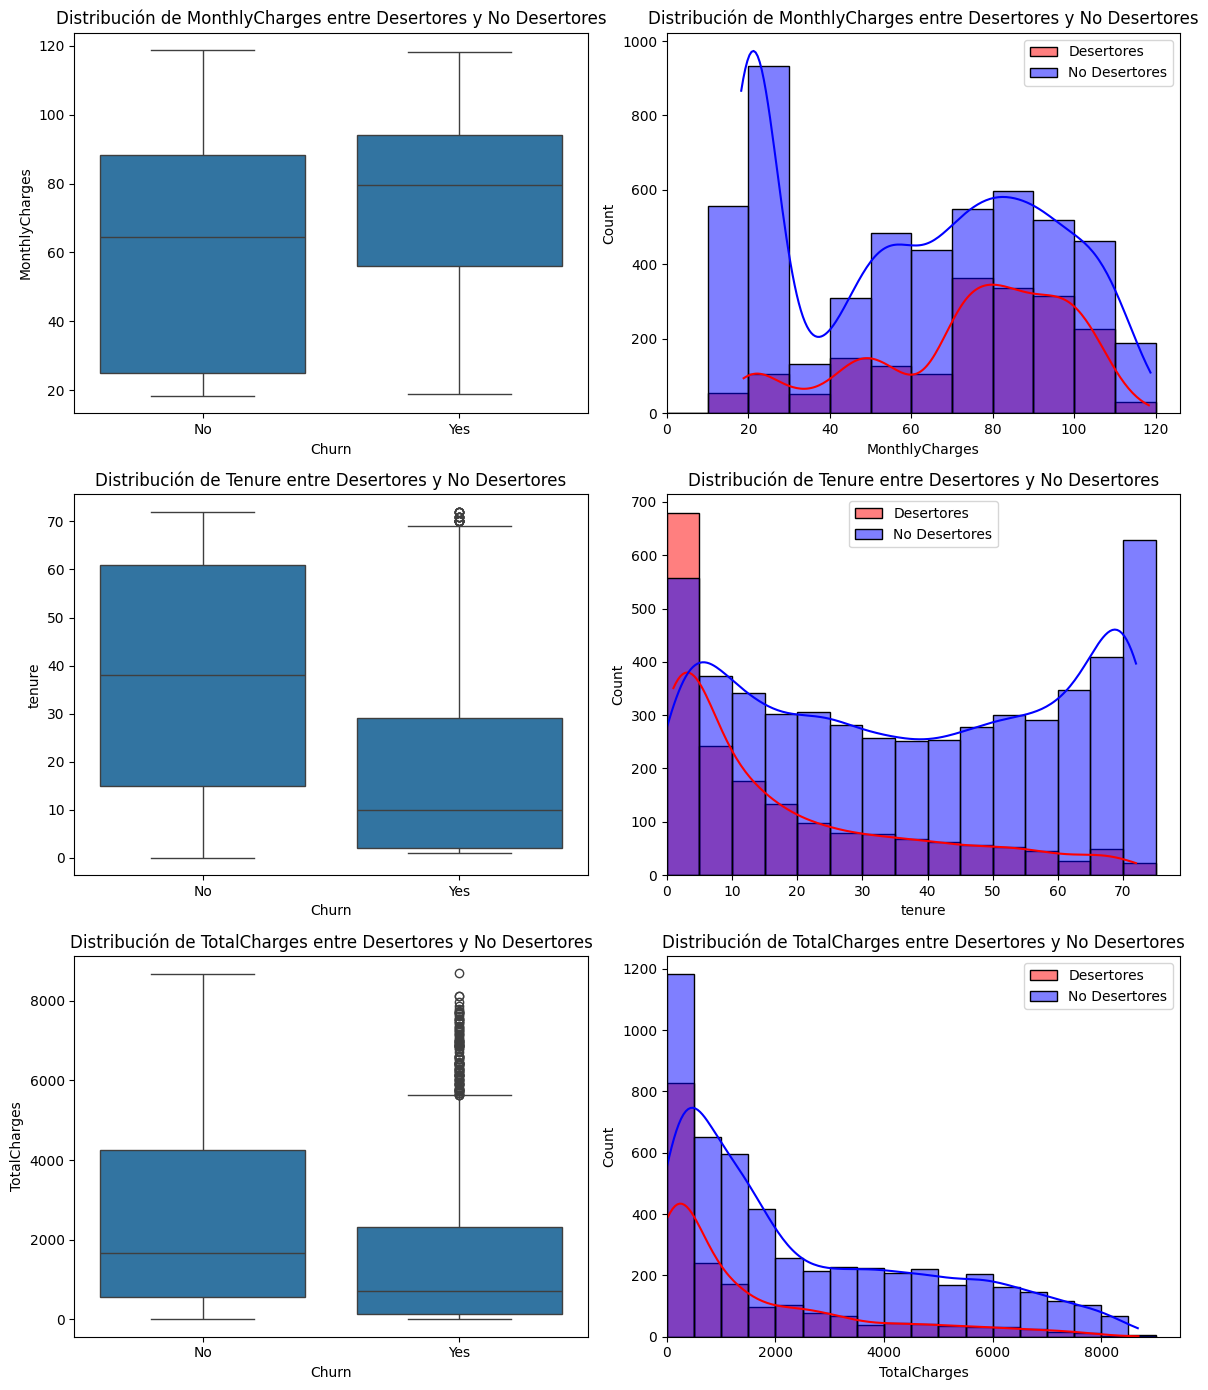

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el ancho de los bins de acuerdo con cada variable
bin_width_monthlycharges = 10  # Ancho de bin para MonthlyCharges
bin_width_tenure = 5           # Ancho de bin para Tenure
bin_width_totalcharges = 500   # Ancho de bin para TotalCharges

# Crear subgráficos con 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(12, 14))

# Boxplot de 'MonthlyCharges' para desertores vs no desertores
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de MonthlyCharges entre Desertores y No Desertores')

# Histograma de 'MonthlyCharges' para desertores vs no desertores
sns.histplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color='red', kde=True, label='Desertores', ax=axes[0, 1],
             bins=range(0, int(df['MonthlyCharges'].max()) + bin_width_monthlycharges, bin_width_monthlycharges))
sns.histplot(df[df['Churn'] == 'No']['MonthlyCharges'], color='blue', kde=True, label='No Desertores', ax=axes[0, 1],
             bins=range(0, int(df['MonthlyCharges'].max()) + bin_width_monthlycharges, bin_width_monthlycharges))
axes[0, 1].legend()
axes[0, 1].set_title('Distribución de MonthlyCharges entre Desertores y No Desertores')
axes[0, 1].set_xlim(left=0)  # Forzar el límite izquierdo a 0

# Boxplot de 'Tenure' para desertores vs no desertores
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Tenure entre Desertores y No Desertores')

# Histograma de 'Tenure' para desertores vs no desertores
sns.histplot(df[df['Churn'] == 'Yes']['tenure'], color='red', kde=True, label='Desertores', ax=axes[1, 1],
             bins=range(0, int(df['tenure'].max()) + bin_width_tenure, bin_width_tenure))
sns.histplot(df[df['Churn'] == 'No']['tenure'], color='blue', kde=True, label='No Desertores', ax=axes[1, 1],
             bins=range(0, int(df['tenure'].max()) + bin_width_tenure, bin_width_tenure))
axes[1, 1].legend()
axes[1, 1].set_title('Distribución de Tenure entre Desertores y No Desertores')
axes[1, 1].set_xlim(left=0)  # Forzar el límite izquierdo a 0

# Boxplot de 'TotalCharges' para desertores vs no desertores
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Distribución de TotalCharges entre Desertores y No Desertores')

# Histograma de 'TotalCharges' para desertores vs no desertores
sns.histplot(df[df['Churn'] == 'Yes']['TotalCharges'], color='red', kde=True, label='Desertores', ax=axes[2, 1],
             bins=range(0, int(df['TotalCharges'].max()) + bin_width_totalcharges, bin_width_totalcharges))
sns.histplot(df[df['Churn'] == 'No']['TotalCharges'], color='blue', kde=True, label='No Desertores', ax=axes[2, 1],
             bins=range(0, int(df['TotalCharges'].max()) + bin_width_totalcharges, bin_width_totalcharges))
axes[2, 1].legend()
axes[2, 1].set_title('Distribución de TotalCharges entre Desertores y No Desertores')
axes[2, 1].set_xlim(left=0)  # Forzar el límite izquierdo a 0

# Ajustar los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


**Perfil del posible desertor:** Cliente reciente, con contrato mensual, factura elevada, sin servicios añadidos de seguridad o soporte técnico, factura electrónica, y que utiliza fibra óptica. Es el perfil más común de deserción.

- **Contract**: Month-to-month --> Tasa de deserción muy alta (42.71%)
- **OnlineSecurity / TechSupport / OnlineBackup**: No --> Tasa de deserción muy alta (alrededor del 40%)
- **PaperlessBilling**: Yes (Tasa de deserción del 33.57%)
- **InternetService**: Fiber optic --> Tasa de deserción muy alta (41.89%)
- **Tenure** (meses de permanencia): Baja (18 de media y el 75% tienen 29 o menos meses de permanencia)
- **TotalCharges** (factura total): No muy alta (1532 de media)
- **MonthlyCharges** (factura mensual): Mas alta (74 de media)

**Perfil del que no es posible desertor**: Cliente con contrato de largo plazo, con servicios añadidos, menor facturación mensual, sin facturación electrónica ni servicio de internet, y que lleva mucho tiempo en la empresa. Son clientes más tradicionales y menos propensos al cambio.
- **Contract**: Two Year --> Tasa de deserción muy baja (2.83%)
- **OnlineSecurity / TechSupport / OnlineBackup**: Yes o No internet service
- **PaperlessBilling**: No
- **InternetService**: DSL o No Internet
- **Tenure** (meses de permanencia): Alta (38 de media y mediana)
- **TotalCharges** (factura total): Alta (2550 de media)
- **MonthlyCharges** (factura mensual): Menor (62 de media)

### 2. Segmentación/creación de grupos entre los desertores y los no desertores. Os piden también agrupar los usuarios dentro de cada clase en función de sus atributos más relevantes. Esta segmentación será clave para diseñar la campaña de incentivos.

In [ ]:
# 1. Seleccionamos las variables más relevantes
top_features = feature_importance_df.head(10).index.tolist()

df_cluster = df.copy()
df_cluster = pd.get_dummies(df_cluster[top_features])

# Añadimos columna Churn para separar
df_cluster['Churn'] = df['Churn']

# 2. Separamos en desertores y no desertores
desertores = df_cluster[df_cluster['Churn'] == 'Yes'].drop('Churn', axis=1)
no_desertores = df_cluster[df_cluster['Churn'] == 'Yes'].drop('Churn', axis=1)

# 3. Escalamos
scaler = StandardScaler()
X_desertores = scaler.fit_transform(desertores)
X_no_desertores = scaler.fit_transform(no_desertores)

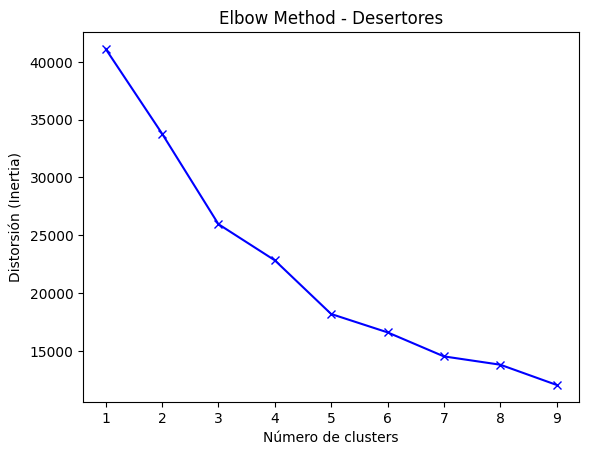

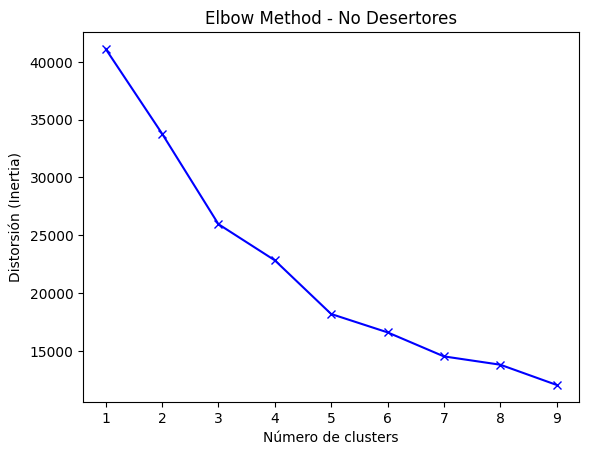

In [ ]:
# 4. Encontramos el numero optimo de clusters. Usamos el metodo del codo
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow(X, title):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure()
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distorsión (Inertia)')
    plt.title(f'Elbow Method - {title}')
    plt.show()

plot_elbow(X_desertores, 'Desertores')
plot_elbow(X_no_desertores, 'No Desertores')

In [ ]:
# 5. Aplicamos KMeans con número óptimo de clusters
# El codo se da entre 3 y 5 clústers (seleccionamos 5 clusters)
kmeans_desertores = KMeans(n_clusters=5, random_state=42)
desertores['Cluster'] = kmeans_desertores.fit_predict(X_desertores)

kmeans_no_desertores = KMeans(n_clusters=5, random_state=42)
no_desertores['Cluster'] = kmeans_no_desertores.fit_predict(X_no_desertores)


In [ ]:
# 6. Análisis de clusters

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

print("\n--- Desertores ---")
desertores.groupby('Cluster').mean()


--- Desertores ---


,tenure,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,PhoneService_No,PhoneService_Yes
Cluster,,,,,,,,,,,,,,,,,,,,,,
0,7.769231,53.207692,442.884413,0.975709,0.024291,0.000000,0.765182,0.0,0.234818,0.785425,0.0,0.214575,0.404858,0.595142,1.000000,0.000000,0.0,0.829960,0.0,0.170040,0.0,1.0
1,15.877285,86.231810,1445.147563,1.000000,0.000000,0.000000,0.894691,0.0,0.105309,0.896432,0.0,0.103568,0.171453,0.828547,0.000000,1.000000,0.0,0.730200,0.0,0.269800,0.0,1.0
2,15.835294,37.533824,687.087941,0.900000,0.082353,0.017647,0.829412,0.0,0.170588,0.835294,0.0,0.164706,0.305882,0.694118,1.000000,0.000000,0.0,0.700000,0.0,0.300000,1.0,0.0
3,8.238938,20.368142,173.919912,0.876106,0.079646,0.044248,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.628319,0.371681,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.0,1.0
4,51.673684,95.925526,5034.747368,0.068421,0.721053,0.210526,0.542105,0.0,0.457895,0.421053,0.0,0.578947,0.257895,0.742105,0.221053,0.778947,0.0,0.368421,0.0,0.631579,0.0,1.0


In [ ]:
print("\n--- No Desertores ---")
no_desertores.groupby('Cluster').mean()


--- No Desertores ---


,tenure,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,PhoneService_No,PhoneService_Yes
Cluster,,,,,,,,,,,,,,,,,,,,,,
0,7.769231,53.207692,442.884413,0.975709,0.024291,0.000000,0.765182,0.0,0.234818,0.785425,0.0,0.214575,0.404858,0.595142,1.000000,0.000000,0.0,0.829960,0.0,0.170040,0.0,1.0
1,15.877285,86.231810,1445.147563,1.000000,0.000000,0.000000,0.894691,0.0,0.105309,0.896432,0.0,0.103568,0.171453,0.828547,0.000000,1.000000,0.0,0.730200,0.0,0.269800,0.0,1.0
2,15.835294,37.533824,687.087941,0.900000,0.082353,0.017647,0.829412,0.0,0.170588,0.835294,0.0,0.164706,0.305882,0.694118,1.000000,0.000000,0.0,0.700000,0.0,0.300000,1.0,0.0
3,8.238938,20.368142,173.919912,0.876106,0.079646,0.044248,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.628319,0.371681,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.0,1.0
4,51.673684,95.925526,5034.747368,0.068421,0.721053,0.210526,0.542105,0.0,0.457895,0.421053,0.0,0.578947,0.257895,0.742105,0.221053,0.778947,0.0,0.368421,0.0,0.631579,0.0,1.0


Podemos dividir los desertores y no desertores en grupos. Por un lado vamos a dividir los **desertores**:


- **Grupo 0: Clientes con DSL y servicios básicos**: Usuarios con contrato mensual, baja permanencia, usan Internet DSL y pocos servicios digitales extra.
  - **Permanendia muy baja**: tenure 7.8 meses de media
  - **Facturacion mensual media**: MonthlyCharges 53.2 de media
  - **Facturación total baja**: 442.9 de media
  - **Internet: DSL**
  - **Muy baja contratacion de servicios digitales**: OnlineSecurity / TechSupport / OnlineBackup --> No (80%), Yes (20%)
  - **Contrato mes a mes** (en el 97.6% de los casos)
  - **Télefono**: Sí (100%)


- **Grupo 1: Clientes con fibra óptica y alta facturación**: Clientes con contrato mensual, Internet de alta velocidad (fibra óptica), uso moderado de servicios y alta facturación.
  - **Permanendia baja**: tenure 15.9 meses de media
  - **Facturacion mensual alta**: MonthlyCharges 86.2 de media
  - **Factura total media-alta**: 1445 de media
  - **Internet: fibra óptica**
  - **Pocos servicios digitales**: OnlineSecurity / TechSupport / OnlineBackup --> No (70%), Yes (30%)
  - **Contratos mes a mes** (100%)
  - **Télefono**: Sí (100%)
  - **Facturación en papel: Sí** (100%)

- **Grupo 2: Clientes con DSL y sin teléfono**: Usuarios con Internet DSL, sin servicio telefónico, permanencia moderada y bajo gasto mensual.
  - **Permanendia baja**: tenure 15.8 meses de media
  - **Facturacion mensual baja**: MonthlyCharges 37.5 de media
  - **Facturacion total baja**: 687 de media
  - **Internet: DSL**
  - **Muy baja contratacion de servicios digitales**: OnlineSecurity / TechSupport / OnlineBackup --> No (80%), Yes (20%)
  - **Contratos mes a mes** (90%)
  - **Télefono**: No (100%)
  - **Facturación sin papel: Sí** (69.4%)

- **Grupo 3: Clientes con servicios mínimos y baja permanencia**: Sin Internet, sin servicios adicionales, contrato mensual, muy baja facturación. Poco rentable y difícil de fidelizar.
  - **Permanencia muy baja**: tenure 8.2 meses de media
  - **Facturacion mensual muy baja**: MonthlyCharges 20.4 de media
  - **Facturación total muy baja**: 173.9 de media
  - **Internet: No**
  - **Ningún servicio digital**:OnlineSecurity / TechSupport / OnlineBackup --> No (100%)
  - **Contratos mes a mes** (87.6%)
  - **Télefono**: Sí (100%)
  - **Facturación sin papel: No** (62.8%)

- **Grupo 4: Clientes leales con servicios premium**: clientes con contrato a largo plazo, servicios digitales contratados y alto gasto mensual. Muy rentables.
  - **Permanendia alta**: tenure 51.7 meses de media
  - **Facturacion mensual alta**: MonthlyCharges 95.9 de media
  - **Factura total muy alta**: 5034 de media
  - **Internet: fibra óptica** (78%) /**DSL** (22%)
  - **Alta contratacion de servicios digitales**: OnlineSecurity / TechSupport --> No (55%), Yes (45%). OnlineBackup --> No (63%), Yes (37%)
  - **Contratos anuales o bianuales** (93%)
  - **Télefono**: Sí (100%)
  - **Facturación sin papel: Sí** (74%)

Por otro lado vamos a dividir los **no desertores**:

- ...

3. Diseño de la campaña de incentivos. Hay que identificar qué incentivos se ofrece a
cada grupo. Para ello habrá que estimar el valor estimado derivado de la realización e
la campaña en cada uno de los grupos de interés